<div class="alert alert-block alert-info">

**Accessibility of the notebook:**
- You can adjust the width of the text with the function provided below. Copy it into a new code cell and execute it using the `ipykernel`.
    ```python
    from IPython.core.display import HTML
    def set_width(width):
        display(HTML(f"""<style>  
                .container {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} 
                .jp-Cell {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} </style>"""))
    # Set container width to X% of the fullscreen 
    set_width(50)
    ```
- You can toggle the auto-numbering of the sections in the outline toolbox (sidebar or topbar).
- You can toggle the code line numbers in the dropdown menu of the "view" button in the topbar. 
- You can collapse/expand a cell by clicking the blue bar on the left side of the cell.

</div>

In [ ]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

Experiments of this week:
-   experiment 2A: Investigate the AC/DC coupling and the AC frequency dependency with the oscilloscope
-   experiment 2B: Apply the correct triggering between function generator and oscilloscope
-   experiment 2C: Use the picopi to measure the Thevenin equivalent of a circuit

Goal: learn how to use function generator, digital multimeter and voltage dividers to measure and control circuits

Structure of experiment:
- Background+Anticipate (10+10+15 min): per person. This is homework.
- Simulate: not this time
- Implement & Investigate (25+30+20 min): with partner (group of 2)
- Compare & Conclude (10 min): with group of 4 (per table)

# 2A: Scope: AC/DC and AC frequency dependency scope

> <font color='blue'>Learning goal:</font> be able to measure or calculate voltage and frequency with the oscillator, and understand how changing settings on the function generator and oscilloscope change your measurement.

>This is an overview of the settings you will explore. They are broken in to I&I1, I&I2, and I&I3 you will find further below. 
>* scope option: channels
>* scope option: measure in AC or DC
>* scope option: triggering on channel 1
>* function generator: duty cycle & scope: coupling
>* function generator + scope: signal with varying duty cycle and varying frequency

## Background 
> <font color='grey'>⏳ Estimated time: 10 min</font>

The oscilloscope is an indispensable device to test electronic circuits and is an important complement to the DMM. It allows the observation of signals that vary over time and therefore allows a better study of parameters such as frequency and amplitude for AC signals. 
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/ELC3a%20scope.jpg" width=50%></img>

In this practical session, you will learn how to use the oscilloscope to test AC signals generated with the function generator. In later assignments, you will also use the oscilloscope to study how AC signals behave in RC and RL circuits. Finally, you will study the use of high impedance oscilloscope probes. 

You will use the function generator to generate a signal (from the output), and the oscillscope to record this signal (with channel 1). The two devices are to be connected by a coax cable, which is a cable with an inner connector (=signal line) and outer shield (=COM, or ground), and can be seen as 2 cables in one.
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/ELC-coax%20cable.JPG" width=50%></img>

Watch the movie clip below to get a quick intro into the scope

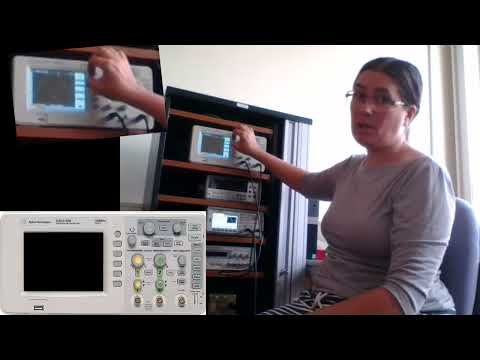

In [1]:
## SCR-scope 


from IPython.lib.display import YouTubeVideo
YouTubeVideo('ecqLWHD7bDM', width = 600, height = 450)

## Anticipate 1: Calculate the right Oscilloscope settings
> <font color='grey'>⏳ Estimated time: 10 min</font>

You need to be able to set the scope settings yourself (the auto scale button is helpful, but not flawless)

Calculate the correct settings (time/div and V/div) for signal 1:
* Input = a square or block wave of frequency 100Hz, amplitude 3Vpp and duty cycle 50%.
* Display = 6 full cycles and full amplitude 3 divisions. 
* Oscilloscope (12 divisions wide, 8 divisions heigh)

Calculate the right input voltage and frequency for signal 2:
* A sine wave is displayed in the oscilloscope (12 divisions wide, 8 divisions heigh)
* Its peak-to-peak amplitude is 5 divisions and 3 full cycles fit the display. 
* Settings are 500mV/division and 5ms/division.


> **<font color='red'>__optional challenge__: </font>** (feel free, if you want to practice more) <br>
Considering a sine wave of 3Vp, calculate the missing parameter

>* 1.5	Cycles displayed; 10 ms/division: 	Frequency of the signal (Hz)??
>* 0.02 ms/div; 8300 Hz:   how many cycles displayed?
>* 3 Cycles displayed; 500 Hz: what is the scale (ms/div)	



In [ ]:
### TO DO="the correct settings for signal 1&2"


## Anticipate 2: How will AC/DC mode and signal's frequency influence the measured Voltage 
> <font color='grey'>⏳ Estimated time: 15 min</font>

A scope can display in AC mode (average subtracted), or DC mode. You will vary the duty cycle (% of a blockwave signal being high).
* What is the influence of changing the duty cycle of a signal, on the displayed AC signal on the scope?
* When going to low frequency signals (sine < 0.5 Hz), how will the choice of AC/DC coupling affect the measured signal?

> https://en.wikipedia.org/wiki/Duty_cycle: The duty cycle D is defined as the ratio between the pulse duration, or pulse width (PW) and the period (T) of a rectangular waveform
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/PWM_duty_cycle_with_label.jpg" width=50%></img>

> In DC mode: the displayed voltage is the actual voltage Vin <br>
> In AC mode: the displayed voltage is Vin - average(Vin)
> Below diagrams from UofW lab notes (https://ece.uwaterloo.ca/~lab140/scope_notes.pdf): 
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/AC-DC coupling.JPG" width=50%></img>

> in AC an additional capacitor filters out the low frequencies. Note that a constant value can be seen as a signal with freuqency  0 Hz. 

In [ ]:
### TO DO="## your answer to: influence of AC/DC mode and frequency on measured signal"


Watch the following movie to get a quick intro on what you will be doing while doing the measurements

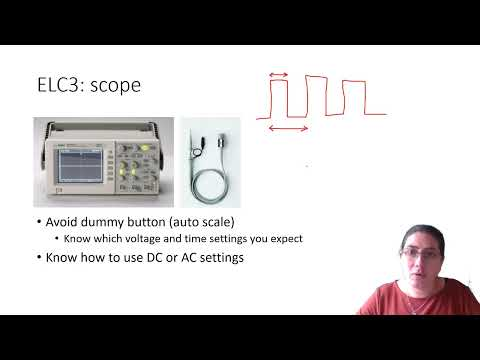

In [2]:
## precap ELC3

from IPython.lib.display import YouTubeVideo
YouTubeVideo('Iqojk0z8l_0', width = 600, height = 450)

## Implement & Investigate 1: Measure the function generator's output with the scope
> <font color='grey'>⏳ Estimated time: 25 min</font>

* Connect the output of the function generator to CH1 of the scope and generate a signal. 
    * Use a coax cable to connect the two devices.
    * Make sure that the correct LOAD resistance is entered (HIGH Z) under UTILITY / OUTPUT SETUP. 
    * Set the generator to a 25 Hz sine wave with an amplitude of 3 Vpp, a DC offset of 1.5 V.
    * Don't forget to switch the output on
    
* Turn on the oscilloscope. 
    * Channels 1 and 2 (CH1 and CH2) can be switched on and off by pressing the buttons “1” and “2.” 
      * To switch on a channel that is off, press the button once. 
      * To switch off a channel that is on, press the button twice. 
    * switch channel 1 on, and channel 2 off. 

* Correctly adapt channel 1's settings 
    * Press button “1” once, while looking at the screen. 
    * For a short while a menu should appear, with “CH1” written on top. 
    * Next, press the button “MENU ON/OFF.” You should see the same menu. 
    * To change a menu setting, press the corresponding menu button
      * this button is on the right-hand side of the screen while the menu is visible. 
    * find the menu setting “Coupling.” Set Ch1 to "DC" coupling 
    * (Do not change the other settings! Leave “BW Limit” at ‘OFF,” “Probe” at “1X” and “Invert” at “OFF.”) 

    * Also set the vertical scale to 1.00 V/div and set the offset to (precisely) 0.00 V (small coloured knob). 
    * Find the time scale knob. Set the time scale to 50 millisec/div. 
    * Find the trig level knob. Adjust the trigger level to 0.50 V( this doesn't have to be precise).
    * Verify that the scope is triggering on channel 1 by pressing “MODE / COUPLING” if your scope doesn't have this button, check the triggering through "Trig Menu" and see what the source is set on.
    * The menu item “Source” of the trigger menu should read “CH1.” 

* Write down how many cycles or periods you see on the scope screen

> **<font color = 'blue'> Hint: </font>** Scope can be a little finicky when adjusting settings with a knob. Don't get discouraged!<br>
Also if you don't see the full sine wave, change the 1V/div to a different value so you see the whole function

In [ ]:
### TO DO="How many cycles did you observe on the oscilloscope screen?"


## Implement & Investigate 2: Investigate the influence of AC/DC mode on the measured signal
> <font color='grey'>⏳ Estimated time: 30 min</font>

* On the function generator: select a **rectangular** wave of 25 Hz, 4 Vpp, 50% duty cycle, DC offset -2V. 
    * Set the DC offset on the scope to zero. 
    * verify that the minimum and maximum of the measured signal are -2V and +2V. 

* On the scope: switch CH 1 between DC and AC coupling. 
    * Is there a difference between DC and AC coupling?

* On the function generator: set the duty cycle of the rectangular wave to 20%.  
* On the scope: switch CH 1 between DC and AC coupling. 
    * Now you should observe a difference between DC and AC coupling. Describe the difference
     > **<font color = 'blue'> Hint: </font>** try switching back and forth between AC and DC coupling mode, while looking at the signal.<br>
     You do not see any difference? Make sure you are coupling the signal, not the trigger




In [ ]:
### TO DO="Describe the difference between AC/DC for 20% duty cycle?"



## Implement & Investigate 3: Investigate the influence of the signal's frequency on the measured signal
> <font color='grey'>⏳ Estimated time: 20 min</font>

* on the Scope: use AC coupling, 100 ms/div or even 1 sec/div
* on the function generator: Select a **sine** wave of 25 Hz, 4 Vpp, no DC offset. 
    * Adapt the frequency, and observe the influence on the Vout
      * Decrease the frequency from 25 Hz in steps of 1 Hz down to 1 Hz. 
      * Further decrease the frequency of the sine wave, in steps of 100 mHz down to 100 mHz. 
* on the scope, set CH1 to DC coupling. Describe the difference between DC and AC coupling for 100mHz. 

In [ ]:
### TO DO="Describe the influence of DC and AC coupling for a 100 mHz signal"


## Compare&conclude 
> <font color='grey'>⏳ Estimated time: 10 min</font>

Like previous week:

* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 

**to be checked off by a TA:**
1. explanation of the effect of duty cycle on displayed blockwave (DC/AC mode)
2. explanation of the difference between low frequency AC and DC display
3. exit card: 1. Write a brief abstract on what you learned (conclusion, useful graph), 2. Which troubleshooting skills do you want to remember for next sessions, 3. Which code do you copy for use in next sessions,
4. How do think this notebook could be improved

In [ ]:
#2A scope

### TO DO="1. explain duty cycle effect"

### TO DO="2.explain the AC-DC difference at low freuqency"

### TO DO="3a. abstract"


### TO DO="3b. troubleshooting"


### TO DO="3c. code"


### TO DO="4. what changes would you suggest?"







If you got stuck during the measurement, at the end of the lab assignment we offer you a movie clip with our recorded efforts in the lab. If you were successfull with measuring, then skip this movie clip

In [3]:
## recording ELC3

from IPython.lib.display import YouTubeVideo
YouTubeVideo('_NP96CQDCSk', width = 600, height = 450)